# LAB 1: ANN and PyTorch [62 pts]

In this lab, you will start off by constructing a neural networks from scratch to get a stronger understanding of what is required to make neural networks work.

The first part of the lab involves building a neural network from scratch to gain a better understanding of how they work. The second part of the lab involves training a neural network using PyTorch to classify images as either "cat" or "dog".  The code for the neural networks you train will be written for you, and you are not (yet!) expected
to understand all provided code. However, by the end of the lab,
you should be able to:

1. Understand at a high level the training loop for a machine learning model.
2. Understand the distinction between training, validation, and test data.
3. The concepts of overfitting and underfitting.
4. Investigate how different hyperparameters, such as learning rate and batch size, affect the success of training.
5. Compare an ANN (aka Multi-Layer Perceptron) with a CNN.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: 

# PART A: Constructing a Neural Network [15 pt]

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We've seen in the tutorial how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Part A.0 Helper Functions

To help guide the construction we will use the iris dataset that was introduced in the tutorial. Provided are some helper code to get us started:

In [ ]:
# load "Iris_3class.csv" to Google Colab
from google.colab import files
uploaded = files.upload()

In [1]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data = raw_data.values
np.random.shuffle(raw_data)

In [47]:


# split your data into training and validation
X_train = raw_data[0:100,:4]
y_train = raw_data[0:100,4:5].astype(int)
X_val = raw_data[100:,:4]
y_val = raw_data[100:,4:5].astype(int)

print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 1)
float64 int32
(50, 4) (50, 1)
float64 int32


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [48]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [49]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

y_val = to_one_hot(y_val)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 3)
float64 float64
(50, 4) (50, 3)
float64 float64


In [50]:
#verify one-hot encoding
y_train[0:5,:]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Part A.1 Develop a 2-layer ANN [5 pt]
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with resepect to the layer 1 and layer 2 weights.

In [ ]:
#set random seed to remove randomness in the lab
np.random.seed(5)

In [84]:
# write code to create a 2-layer ANN in vectorized form

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

#define softmax
def softmax(x):
  e = np.exp(x)
  return e/e.sum(axis=1, keepdims = True)


def ann(W, X_train, y_train):

  num_hidden = 5
  num_features = 4
  num_outputs = 3

  #Weights
  w0 = W[:20].reshape(num_features, num_hidden)
  w1 = W[20:].reshape(num_hidden, num_outputs)
  #print(w0)
  #print(w1)
  #print(w0.shape)
  #print(w1.shape)
  #Feed forward
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = np.dot(layer1, w1)
  
  # softmax
  output = softmax(layer2)
 
  #Back propagation using gradient descent
  
  #cross-entropy loss
  error = -np.mean(np.sum(y_train * np.log(output), axis=-1)) # TO BE COMPLETED

  #initialize gradients to zero 
  #shape dimensions as weights
  dw0 = np.zeros((num_features, num_hidden)) # TO BE COMPLETED
  dw1 = np.zeros((num_hidden, num_outputs)) # TO BE COMPLETED


  #calculate gradients
  # TO BE COMPLETED
  #calculate gradients
  delta2 = output - y_train
  tdw1 = np.dot(layer1.T, delta2)
  delta1 = np.dot(delta2, w1.T) * (layer1 * (1 - layer1))
  tdw0 = np.dot(layer0.T, delta1)


  #determine gradients
  dw1 += tdw1 # TO BE COMPLETED
  dw0 += tdw0 # TO BE COMPLETED
  
  #combine gradients into one vector
  dW = np.array(list(dw0.flatten()) + list(dw1.flatten()))# TO BE COMPLETED

  return (error, dW, layer2)


## Part A.2 Train your neural network. How well does your network work on the iris dataset? [5 pt]

Part A.2 of the lab assignment is focused on training the neural network that was created in Part 1. The code initializes the number of hidden units, features, and outputs. Then it initializes random weights for the two layers of the network, and combines them into a single vector W. 

In [85]:
num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))
#print(W)

#train network
n = 0.001
iterations = 100000
errors = []
for i in range(iterations):
  (error, dW, y_pred) = ann(W, X_train, y_train)
  W += -dW * n
  errors.append(error)


In [86]:
#examine predictions on training data
(_, _, y_pred) = ann(W, X_train, y_train)
pred = np.round(y_pred, 0)
pred[:5]

#note thay my preditions do seem to match the ground truth below

array([[ 8.,  0., -7.],
       [-2.,  9., -7.],
       [ 8.,  0., -7.],
       [-1.,  9., -7.],
       [-5., -2.,  8.]])

In [54]:
#examine ground truth training data
train = np.round(y_train, 0)
train[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Part A.3 Validate that the gradients were computed correctly for the 2-layer neural network you developed. [5 pt]

Part A.3 is focused on validating the gradients computed for the 2-layer neural network. The code initializes random weights for the two layers of the network and combines them into a single vector W. It then computes the gradients analytically using the ann() function, and then computes the gradients numerically. The code does this by slightly incrementing the weights and computing the errors for each increment. 

In [104]:
#write code to numerical verify the gradients you calculated
np.random.seed(5)

num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights
W = np.array(list(w0.flatten()) + list(w1.flatten())) # TO BE COMPLETED
epsilon = 0.01

#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))

deltas = []

for ind in range(len(W)):
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))
  
  #increment slightly
  We1[ind] += epsilon # TO BE COMPLETED
  We2[ind] += -epsilon # TO BE COMPLETED
  
  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)
  
  #obtain numerical gradients
  grad_num =  (error_e1 - error_e2) / (2*epsilon) # TO BE COMPLETED

  deltas.append(round(abs(grad_num - dW[ind]), 4))
  
  #display difference between numerical and analytic gradients
  print(round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])


2.0962 -0.02118054305848549 -2.1174228591050994
0.0012 1.167420247139006e-05 0.0011654307024229263
4.3552 0.044000656172005215 4.399192077514412
4.6667 -0.04713824934894362 -4.71385775298321
5.681 0.0574673416021354 5.738446583155419
1.455 -0.014699601962353537 -1.4697456128314452
0.0005 5.011868198234737e-06 0.0005010225995672494
3.5171 0.0355319468402171 3.5526095677016465
2.4041 -0.024284137471530798 -2.4283430685868908
0.547 0.0055355293232084435 0.552489638437462
0.5748 -0.0058061101150364 -0.5806119401027443
0.002 2.0178339332765916e-05 0.002015353781745542
0.1489 0.001497754126833506 0.15035542788475134
3.4761 -0.035109582563286335 -3.511224104663122
9.9492 0.10054108924799632 10.049774040178796
0.0796 -0.0008038870903726014 -0.08038928373941437
0.001 9.831964453699271e-06 0.000983045882773757
0.3062 -0.0030933756500539644 -0.30931235926077166
1.2406 -0.012531057679321389 -1.2531191402727297
4.259 0.04302239453706225 4.302033962147207
0.6885 -0.006954104540080053 -0.695410455690

In [ ]:
#we should note that it is irregular to see these occasional spikes in the difference between the numerical and analytical gradients, 
#this indicates something may be wrong with my analytical gradient calculations, as this is the source of the large gradients.

In [105]:
#experiment with epsilon here

#write code to numerical verify the gradients you calculated
np.random.seed(5)

for epsilon in [0.0001,0.001,0.01,0.1]:
  num_hidden = 5
  num_features = 4
  num_outputs = 3
    
  #initialize weights
  w0 = 2*np.random.random((num_features, num_hidden)) - 1
  w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

  #combine weights
  W = np.array(list(w0.flatten()) + list(w1.flatten())) # TO BE COMPLETED
  #epsilon = 0.01

  #compute gradients analytically
  (error, dW, y_pred) = ann(W, X_train, y_train)

  #compute gradients numerically
  dW_num = np.zeros((len(W),1))

  deltas = []

  for ind in range(len(W)):
    #reset gradients
    We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
    We2 = np.array(list(w0.flatten()) + list(w1.flatten()))
    
    #increment slightly
    We1[ind] += epsilon # TO BE COMPLETED
    We2[ind] += -epsilon # TO BE COMPLETED
    
    #compute errors
    (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
    (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)
    
    #obtain numerical gradients
    grad_num =  (error_e1 - error_e2) / (2*epsilon) # TO BE COMPLETED

    deltas.append(round(abs(grad_num - dW[ind]), 4))
    
    #display difference between numerical and analytic gradients
    #print(round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])
  print("epsilon value")
  print(epsilon)
  print("delta numerical gradient - analytical gradient")
  print(np.mean(deltas))

epsilon value
0.0001
delta numerical gradient - analytical gradient
4.734385714285715
epsilon value
0.001
delta numerical gradient - analytical gradient
5.160151428571429
epsilon value
0.01
delta numerical gradient - analytical gradient
5.828237142857143
epsilon value
0.1
delta numerical gradient - analytical gradient
10.439748571428572


In [ ]:
#Experimenting with different epsilon values, we choose epsilon = 0.0001 as this minimizes the average delta between the numerical and analytical gradients

# PART B: Cats vs Dogs [47 pt]

In Part B of the lab, we will use PyTorch to train a neural network to identify cats and Dogs. The code starts by importing some libraries, including numpy, torch, and torchvision. This section provides some helper functions for loading and preprocessing the data.

In [2]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms


## Part B.0 Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.

You should look at the function names and read the docstrings. If you are curious, come back and explore the code *after* making some progress on the lab.

In [3]:
###############################################################################
# Data Loading

def get_relevant_indices(dataset, classes, target_classes):
    """ Return the indices for datapoints in the dataset that belongs to the
    desired target classes, a subset of all possible classes.

    Args:
        dataset: Dataset object
        classes: A list of strings denoting the name of each class
        target_classes: A list of strings denoting the name of desired classes
                        Should be a subset of the 'classes'
    Returns:
        indices: list of indices that have labels corresponding to one of the
                 target classes
    """
    indices = []
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        label_index = dataset[i][1] # ex: 9
        label_class = classes[label_index] # ex: 'truck'
        if label_class in target_classes:
            indices.append(i)
    return indices

def get_data_loader(target_classes, batch_size):
    """ Loads images of cat and dogs, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.

    Args:
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
        batch_size: A int representing the number of samples per batch
    
    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load CIFAR10 training data
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_indices = get_relevant_indices(trainset, classes, target_classes)
    
    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.8) #split at 80%
    
    # split into training and validation indices
    relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]  
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    # Load CIFAR10 testing data
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_test_indices = get_relevant_indices(testset, classes, target_classes)
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

###############################################################################
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

## Part B.1 Visualizing the Data [5 pt]

We will make use of some of the CIFAR-10 data set, which consists of 
colour images of size 32x32 pixels belonging to 10 categories. You can
find out more about the dataset at https://www.cs.toronto.edu/~kriz/cifar.html

For this assignment, we will only be using the cat and dog categories. 
We have included code that automatically downloads the dataset the 
first time that the main script is run.

In [4]:
# This will download the CIFAR-10 dataset to a folder called "data"
# the first time you run this code.
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["cat", "dog"], 
    batch_size=1) # One image per batch

Files already downloaded and verified
Files already downloaded and verified


### Part B.1.a - [1 pt]

Visualize some of the data by running the code below.
Include the visualization in your writeup.

Your figures should show up directly in the jupyter notebook.

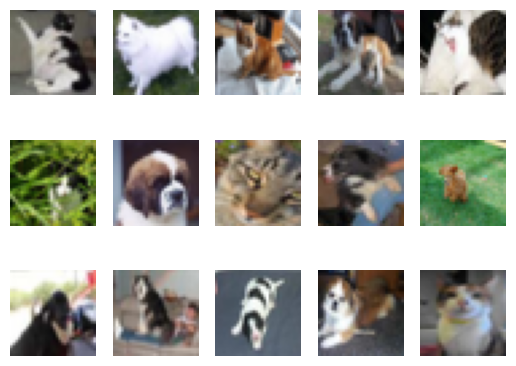

In [5]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

### Part B.1.b - [2 pt]

How many training examples do we have for the combined `cat` and `dog` classes? 
What about validation examples? 
What about test examples?

In [139]:
print(len(train_loader.dataset))
print(len(test_loader.dataset))
print(len(val_loader.dataset))
#print(classes)


50000
10000
50000


In [ ]:
# We have 50000 training samples, 10000 test samples, and 50000 validation samples for the combined cat and dog classes

### Part B.1.c - [2pt]

Why do we need a validation set when training our model? What happens if we judge the 
performance of our models using the training set loss/error instead of the validation
set loss/error?

In [109]:
#We need a validation set in addition to the training set to properly assess the performance of our models during the training process. The validation set 
#provides a measure of the model's ability to perform well on unseen data. The training set is used to train the model and adjust any parameters, but only 
#using the training set loss/error will result in us selecting the model that best fits the training data. This adds the risk of overfitting which occurs 
#when the model becomes too closely fitted to the training data, and its performance on the validation set and on new data can be poor. This is not 
#particularly useful in the real world where we would deploy our model to situations where it has no prior knowledge of the data.

## Part B.2 Training [10 pt]

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.

You won't understand fully what these networks are doing until
the next few classes, and that's okay. For this assignment, please
focus on learning how to train networks, and how hyperparameters affect
training.

In [5]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [6]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 7 * 7, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 7 * 7)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [7]:
small_net = SmallNet()
large_net = LargeNet()

### Part B.2.a - [1pt]

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values. 

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

In [110]:
small_params=0
for param in small_net.parameters():
    small_params+=param.numel()
    print(param.shape)

print(small_params)


print("there are 386 parameters in small net")


torch.Size([5, 3, 3, 3])
torch.Size([5])
torch.Size([1, 245])
torch.Size([1])
386
there are 386 parameters in small net


In [111]:
large_params=0
for param in large_net.parameters():
    large_params+=param.numel()
    print(param.shape)

print(large_params)

print("there are 9705 parameters in large_net, significantly more than small net")

torch.Size([5, 3, 5, 5])
torch.Size([5])
torch.Size([10, 5, 5, 5])
torch.Size([10])
torch.Size([32, 250])
torch.Size([32])
torch.Size([1, 32])
torch.Size([1])
9705
there are 9705 parameters in large_net, significantly more than small net


### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [12]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on cats and dogs
    target_classes = ["cat", "dog"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
           
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

### Part B.2.b - [1pt]

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on. 

What are the default values of the parameters `batch_size`, `learning_rate`, 
and `num_epochs`?

In [112]:
print("the default values are batch_size=64, learning_rate=0.01, num_epochs=30")

the default values are batch_size=64, learning_rate=0.01, num_epochs=30


### Part B.2.c - [1 pt]

What files stored in memory when we call `train_net` with `small_net`, and train for 5 epochs? Provide a list
of all the files written to disk, and what information the files contain.

In [13]:
train_net(small_net,num_epochs=5)

#List of files and their contents

#1) model_small_bs64_lr0.01_epoch4_train_err : Contains the training error values for each of the 5 epochs
#2) model_small_bs64_lr0.01_epoch4_train_loss : Contains the training loss values for each of the 5 epochs
#3) model_small_bs64_lr0.01_epoch4_val_err : Contains the validation error values for each of the 5 epochs
#4) model_small_bs64_lr0.01_epoch4_val_loss : Contains the validation loss values for each of the 5 epochs

#Training/validation error is the percentage of training/validation samples that the model got wrong. The training/validation error is a measure of 
#how well the model generalizes to the training/validation data.

#Training loss, also known as cost or objective function, is a scalar value that represents how well the model is performing.
#It is calculated by applying a loss function to the model's predictions and true values. The loss function measures the difference 
#between the model's predictions and the true values.



Files already downloaded and verified
Files already downloaded and verified
tensor([ 0.0863, -0.2450, -0.0901,  0.0899, -0.1491, -0.0239,  0.1124, -0.3527,
        -0.0412, -0.0143, -0.1714,  0.0039, -0.3379, -0.1024,  0.0005, -0.1130,
         0.0186, -0.0556, -0.0645, -0.1670, -0.2350, -0.0370, -0.2703, -0.0490,
        -0.0064, -0.1269, -0.2434, -0.0602, -0.1063, -0.1643,  0.1284, -0.2155,
        -0.0975, -0.0704, -0.1115, -0.0426, -0.2813, -0.0055,  0.0917,  0.0924,
        -0.2002, -0.0021, -0.2006,  0.0784, -0.1954,  0.0368, -0.1991, -0.0755,
        -0.0901, -0.2554,  0.0438,  0.0619, -0.1730, -0.0614,  0.1342,  0.0046,
        -0.0965, -0.3339, -0.2997, -0.3283,  0.0051, -0.2911,  0.0615, -0.0079],
       grad_fn=<SqueezeBackward1>)


NameError: name 'jj' is not defined

### Part B.2.d - [2pt]

Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights) 
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive 
so that the files generated by `train_net` gets saved. We will be using
these files in part (d).
(See the Google Colab tutorial for more information about this.)

Report the total time elapsed when training each network. Which network took longer to train?
Why?

In [ ]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the lab locally, you
# can comment out this code.

from google.colab import drive
drive.mount('/content/gdrive')

In [16]:
train_net(small_net)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.275, Train loss: 0.5459533755779267 |Validation err: 0.3135, Validation loss: 0.5986413713544607
Epoch 2: Train err: 0.275125, Train loss: 0.546554101228714 |Validation err: 0.334, Validation loss: 0.6213844390586019
Epoch 3: Train err: 0.274875, Train loss: 0.5471150019168853 |Validation err: 0.3125, Validation loss: 0.5983112268149853
Epoch 4: Train err: 0.276, Train loss: 0.544853462934494 |Validation err: 0.3045, Validation loss: 0.5959878014400601
Epoch 5: Train err: 0.2745, Train loss: 0.545347457408905 |Validation err: 0.315, Validation loss: 0.5948224309831858
Epoch 6: Train err: 0.275625, Train loss: 0.5437518754005433 |Validation err: 0.309, Validation loss: 0.6048025563359261
Epoch 7: Train err: 0.277875, Train loss: 0.5450202152729035 |Validation err: 0.311, Validation loss: 0.5993716092780232
Epoch 8: Train err: 0.273375, Train loss: 0.543404693365097 |Validation err: 0.3085, 

In [13]:
train_net(large_net)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.465625, Train loss: 0.6918878908157349 |Validation err: 0.447, Validation loss: 0.6876938529312611
Epoch 2: Train err: 0.426625, Train loss: 0.6822281832695007 |Validation err: 0.4125, Validation loss: 0.674863301217556
Epoch 3: Train err: 0.387875, Train loss: 0.661374351978302 |Validation err: 0.3605, Validation loss: 0.639429023489356
Epoch 4: Train err: 0.367375, Train loss: 0.6376411881446838 |Validation err: 0.3825, Validation loss: 0.6519976053386927
Epoch 5: Train err: 0.345625, Train loss: 0.6193898298740387 |Validation err: 0.3325, Validation loss: 0.6172801088541746
Epoch 6: Train err: 0.331875, Train loss: 0.6051544106006622 |Validation err: 0.332, Validation loss: 0.6128026377409697
Epoch 7: Train err: 0.318, Train loss: 0.5929643530845642 |Validation err: 0.321, Validation loss: 0.5986073054373264
Epoch 8: Train err: 0.307625, Train loss: 0.5724639775753021 |Validation err: 0

In [ ]:
#The small net took 513.06 seconds to train, which is slightly more than the large net at 502.97 seconds. At first glance this result is slightly 
#counterintuitive, since we would anticipate it to take greater time and computations to train a network with significantly more parameters 
#(9705 vs 386).There are a couple reasons this may happen. If the network is larger, and has a more complex structure, it may then better fit the 
#training data, allowing the model to be trained faster. More parameters may allow a large model to have a greater capacity to learn and dips in 
#the loss function with respect to the weights can be found with greater efficiency, speeding up training time. The additional paramaters can help 
#a network learn more intricate patterns in the data, giving a lower training error. In this case we also observe a lower validation error, indicating
#that the large model has "learned" from the data and is better at generalizing to new data than the small model. Changes in CPU usage between runs 
#may also affect training time.

### Part B.2.e - [2pt]

Use the function `plot_training_curve` to display the trajectory of the 
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. Include both plots
in your writeup.

SmallNet


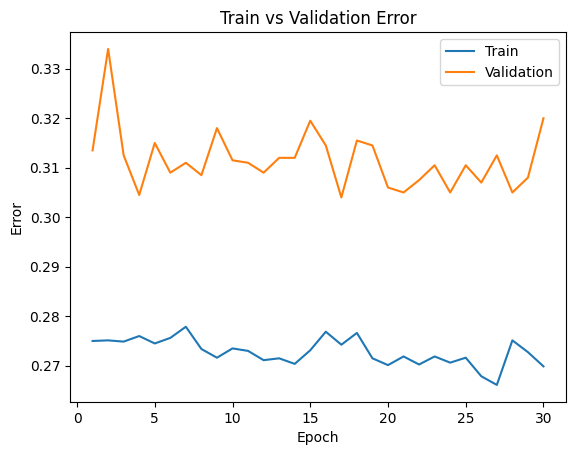

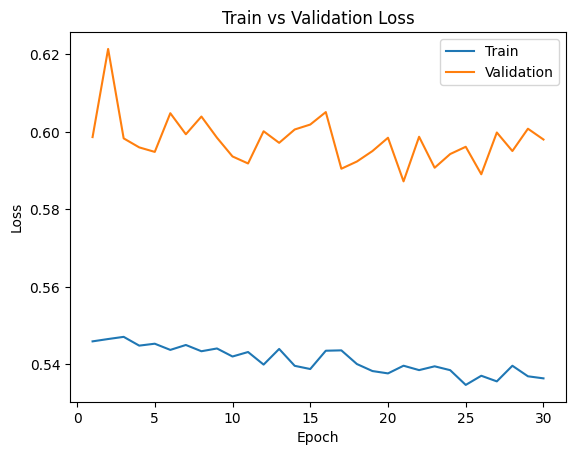

In [113]:
print("SmallNet")
model_path = get_model_name("small", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

LargeNet


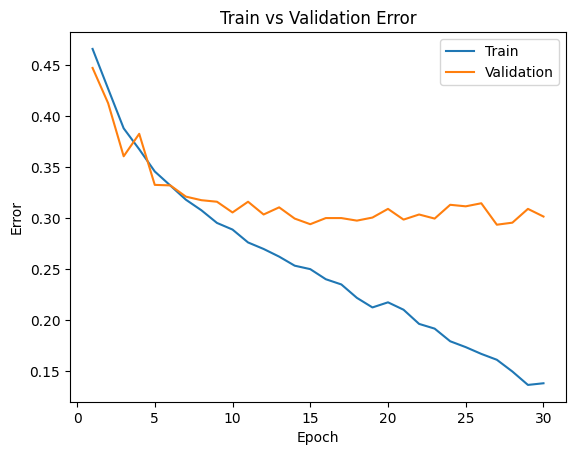

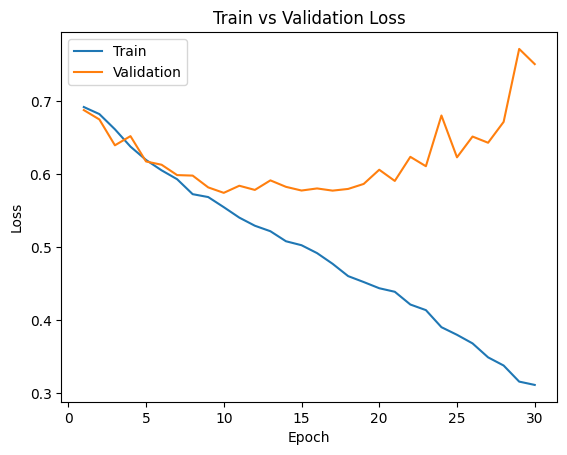

In [114]:
print('LargeNet')
model_path = get_model_name("large", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

### Part B.2.f - [3pt]

Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

In [ ]:
#####FILL IN

#For small_net, we see the training and validation error ossicilate in a tight range for all 30 epochs. The same occurs for the training and 
#validation loss. This differs from large net where we see the training and validation error start at a higher value and then decrease throughout 
#the 30 epochs. In large net, around the 10th epoch, we see the validation error converge and stay at a relatively constant value for the remainder 
#of the epochs. At the 10th epoch, the validation loss begins to increase again for large net. In the above curves, we see a couple occurences of 
#underfit and overfit. 

#Underfitting appears as a high training error and a high validation error, which means that the model is not able to fit the training data well 
#and also performs poorly on unseen data. This is exactly what we see in the plots for small_net. The training error is relatively high, at about 
#0.27,and the validation error is also high, at about 0.32. As the model progresses through the epochs, the training error is not decreasing, 
#meaning the model is not learning the training data any better with each iteration, showing its inability to properly fit. 

#With overfitting, we expect the training error will be low and the validation error will be high. We see this in the case of large_net. At around 
#the 10th epoch, the training error and validation error begin to diverge (training err continues to decrease while validation err does not). This 
#is because the model has learned the noise in the training data, and is now not generalizing well to unseen data in the validation set. The training 
#error continues to decrease with each iteration, and is low, at about 0.15, because the model has learned the training data very well. The validation 
#error is much higher, at about 0.31, as a result of the model having learned the noise/nuances from the training set. Both of these are characteristic 
#with overfit. We also note that the validation loss function continues to increase as the training loss decreases. Thus, as the model is performing 
#better in terms of loss on the training set it is performing worse on the unseen data in the validation set, hence overfitting. 





## Part B.3 Optimization Parameters [4 pt]

For this section, we will work with `large_net` only.

### Part B.3.a - [1pt]

Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

In [20]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.
large_net = LargeNet()

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.47625, Train loss: 0.6928360018730163 |Validation err: 0.467, Validation loss: 0.6924686580896378
Epoch 2: Train err: 0.448625, Train loss: 0.6922589735984802 |Validation err: 0.4305, Validation loss: 0.691649354994297
Epoch 3: Train err: 0.43575, Train loss: 0.6916067447662354 |Validation err: 0.4285, Validation loss: 0.6908544544130564
Epoch 4: Train err: 0.430125, Train loss: 0.6908613042831421 |Validation err: 0.424, Validation loss: 0.6896594148129225
Epoch 5: Train err: 0.43425, Train loss: 0.6899195232391357 |Validation err: 0.4195, Validation loss: 0.6886937469244003
Epoch 6: Train err: 0.435875, Train loss: 0.6887414751052856 |Validation err: 0.4195, Validation loss: 0.6867829691618681
Epoch 7: Train err: 0.436875, Train loss: 0.687377788066864 |Validation err: 0.4185, Validation loss: 0.6851983014494181
Epoch 8: Train err: 0.437375, Train loss: 0.6859265627861023 |Validation err:

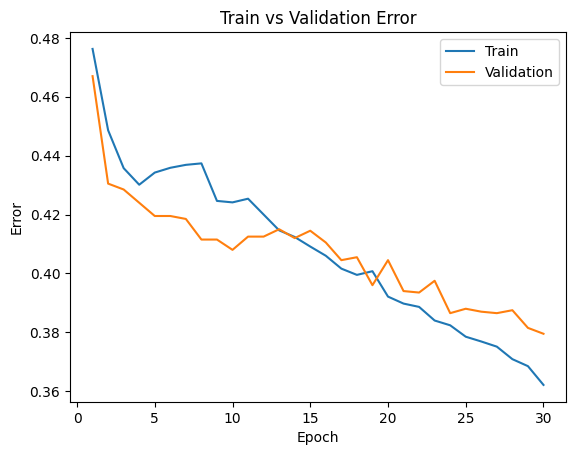

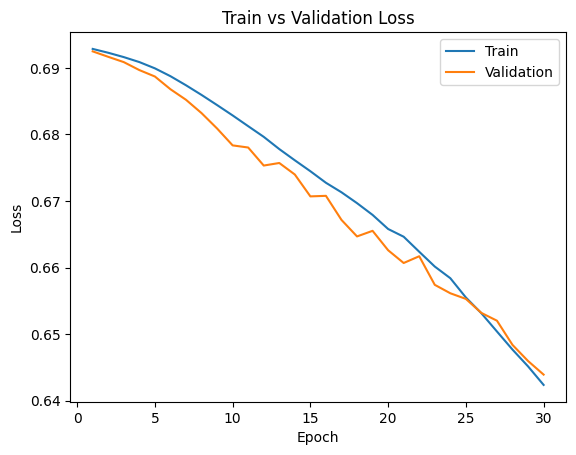

In [29]:
large_net = LargeNet()
train_net(large_net,learning_rate=0.001)
model_path = get_model_name("large", batch_size=64, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)


In [ ]:
#Here, the model took about 200 seconds less in training time. A lower learning rate means that the model's weights are being updated by a 
#smaller amount with each iteration of the training process, so it should take more iterations for the model to converge to an optimal set of 
#weights. This explains why at the end of 30 epochs we see a higher training and validation error than the default case. 
#Additionally, since the model's weights are being updated by a smaller amount each iteration, the model will be less likely to
#overshoot the optimal set of weights, which can help to reduce overfitting. This model appears slighly underfit and we see a worse validation
#error than the default case.


### Part B.3.b - [1pt]

Train `large_net` with all default parameters, except set `learning_rate=0.1`. 
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.429875, Train loss: 0.6752147841453552 |Validation err: 0.378, Validation loss: 0.6376222502440214
Epoch 2: Train err: 0.36025, Train loss: 0.6385925107002258 |Validation err: 0.373, Validation loss: 0.6407255213707685
Epoch 3: Train err: 0.360125, Train loss: 0.6301598052978515 |Validation err: 0.344, Validation loss: 0.6085634734481573
Epoch 4: Train err: 0.331625, Train loss: 0.6087012732028961 |Validation err: 0.3265, Validation loss: 0.6142764631658792
Epoch 5: Train err: 0.329125, Train loss: 0.5993719940185547 |Validation err: 0.319, Validation loss: 0.5952425822615623
Epoch 6: Train err: 0.319125, Train loss: 0.5827840561866761 |Validation err: 0.3275, Validation loss: 0.6218304950743914
Epoch 7: Train err: 0.312125, Train loss: 0.5771552224159241 |Validation err: 0.33, Validation loss: 0.5920566841959953
Epoch 8: Train err: 0.293875, Train loss: 0.5566371717453003 |Validation err:

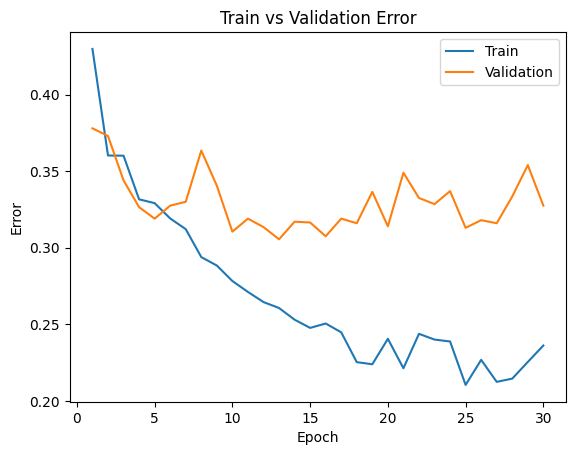

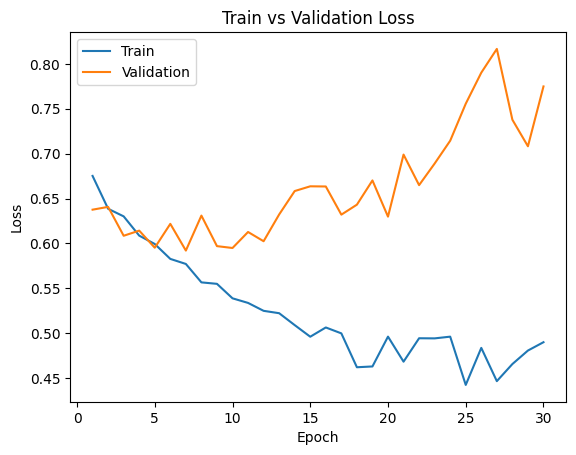

In [30]:
large_net = LargeNet()
train_net(large_net,learning_rate=0.1)
model_path = get_model_name("large", batch_size=64, learning_rate=0.1, epoch=29)
plot_training_curve(model_path)

In [ ]:
#Here the model has taken roughly the same training time as the default case. Increasing the learning rate of an ANN can cause the model to 
#converge to a solution faster, but it can also cause the model to overshoot the optimal solution. This is exactly what we see here, with 
#clear evidence of overshooting, as the training error is low and the validation error is high. Increasing learning rate can also cause 
#the model to become unstable, with the cost function diverging, which we also see here in the validation 
#loss. In the end, the validation error ends up decreasing from the previous case, but is still about the same as the default case.



### Part B.3.c - [1pt]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.48175, Train loss: 0.6929379515349865 |Validation err: 0.478, Validation loss: 0.6926823854446411
Epoch 2: Train err: 0.457625, Train loss: 0.6924103945493698 |Validation err: 0.434, Validation loss: 0.6917425394058228
Epoch 3: Train err: 0.437, Train loss: 0.6916500367224216 |Validation err: 0.4265, Validation loss: 0.6909129768610001
Epoch 4: Train err: 0.433625, Train loss: 0.6908450089395046 |Validation err: 0.424, Validation loss: 0.6897871047258377
Epoch 5: Train err: 0.434125, Train loss: 0.6896936297416687 |Validation err: 0.424, Validation loss: 0.6881358772516251
Epoch 6: Train err: 0.43825, Train loss: 0.6883534863591194 |Validation err: 0.428, Validation loss: 0.6860135495662689
Epoch 7: Train err: 0.43925, Train loss: 0.6866876073181629 |Validation err: 0.426, Validation loss: 0.6836975961923599
Epoch 8: Train err: 0.435375, Train loss: 0.6849775686860085 |Validation err: 0.41

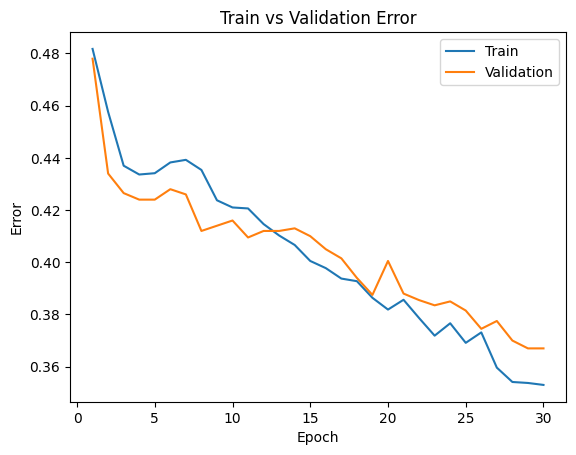

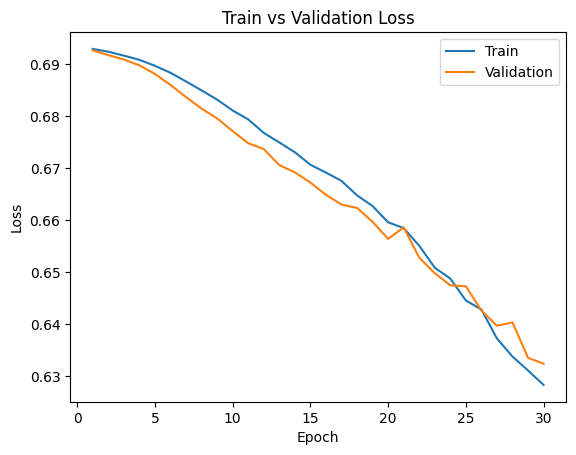

In [31]:
large_net = LargeNet()
train_net(large_net,learning_rate=0.01,batch_size=512)
model_path = get_model_name("large", batch_size=512, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

In [ ]:
#Here we see roughly the same training time as the default case. With increasing the batch size of an ANN we would 
#typically expect the model to take longer to train. This is because a larger batch size means that more data is being 
#processed with each iteration, which can slow down the training process. However, it can also lead to a 
#smoother convergence as the gradient descent step is calculated with more data points. This however means that it can 
#take more epochs to converge to the optimal solution. We see that here the validation error decreases smoothly, but 
#ends up at a higher value than the default case. Since it would take more epochs to converge to the optimal
#solution, we do see underfit here, and as such the validation error is higher than the default case. 


### Part B.3.d - [1pt]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.432625, Train loss: 0.6776098036766052 |Validation err: 0.3745, Validation loss: 0.6529334583282471
Epoch 2: Train err: 0.3665, Train loss: 0.6396277223825455 |Validation err: 0.352, Validation loss: 0.6202158811092376
Epoch 3: Train err: 0.34725, Train loss: 0.6143462228178977 |Validation err: 0.346, Validation loss: 0.6253165183067322
Epoch 4: Train err: 0.317625, Train loss: 0.5879196848273277 |Validation err: 0.3425, Validation loss: 0.6118130431175232
Epoch 5: Train err: 0.30225, Train loss: 0.5705399339795113 |Validation err: 0.307, Validation loss: 0.5756308646202087
Epoch 6: Train err: 0.284875, Train loss: 0.5471071794629097 |Validation err: 0.3035, Validation loss: 0.5789630904197692
Epoch 7: Train err: 0.2735, Train loss: 0.5284475952982902 |Validation err: 0.308, Validation loss: 0.5984742820262909
Epoch 8: Train err: 0.263125, Train loss: 0.5129552674889565 |Validation err: 0.

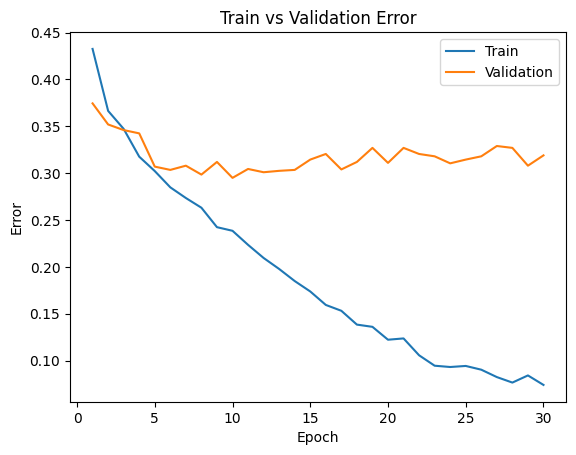

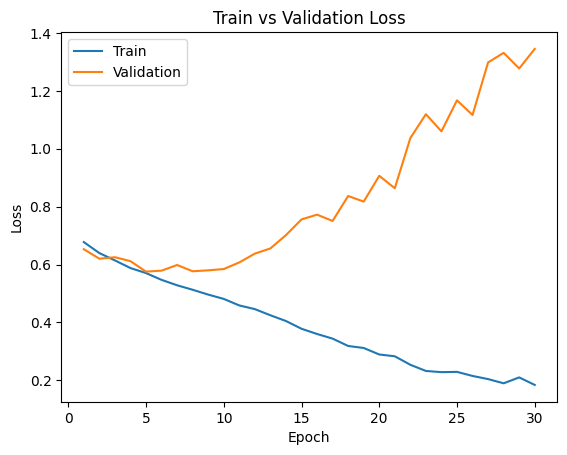

In [32]:
large_net = LargeNet()
train_net(large_net,learning_rate=0.01,batch_size=16) 
model_path = get_model_name("large", batch_size=16, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

In [ ]:
#Here the model took slightly longer to train which is typically the result of decreasing the batch size. 
#This is because the model updates its weights and biases less frequently, and each update is based on a 
#smaller sample of the training data. Additionally, with a smaller batch size, the model is more likely to be 
#sensitive to the specific random samples chosen for each batch, which can increase the variance of the model. 
#This sensitivity is evident as we see signs of overfit, with a high validation error, and low training error. 
#It is also worth noting that the validation loss is very high, showing how much the model is struggling to 
#generalize to unseen data.


## Part B.4 Hyperparameter Search [4 pt]

### Part B.4.a - [1pt]

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.

In [69]:
#We saw some evidence of underfit with lowering the learning rate, and some evidence of overfit with decreasing the 
#batch size, by lowering learning rate and increasing batch size, I hope to achieve an intermediate fit that will be
#closer to the optimal solution, and give a lower validation error. We will use the same network for comparision.


### Part B.4.b - [1pt]

Train the model with the hyperparameters you chose in part(a), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.454875, Train loss: 0.6919687849283218 |Validation err: 0.4335, Validation loss: 0.6896940712928772
Epoch 2: Train err: 0.441875, Train loss: 0.6881973779201508 |Validation err: 0.4155, Validation loss: 0.6840251407623291
Epoch 3: Train err: 0.425125, Train loss: 0.6826276956796646 |Validation err: 0.4065, Validation loss: 0.6760383324623108
Epoch 4: Train err: 0.413125, Train loss: 0.6765848940610886 |Validation err: 0.4105, Validation loss: 0.6703994107246399
Epoch 5: Train err: 0.4025, Train loss: 0.670729576587677 |Validation err: 0.4045, Validation loss: 0.6636608080863953
Epoch 6: Train err: 0.388875, Train loss: 0.6635061954259872 |Validation err: 0.389, Validation loss: 0.6577484788894653
Epoch 7: Train err: 0.383125, Train loss: 0.6566253368854522 |Validation err: 0.387, Validation loss: 0.6488993744850159
Epoch 8: Train err: 0.37225, Train loss: 0.6455217918157578 |Validation err

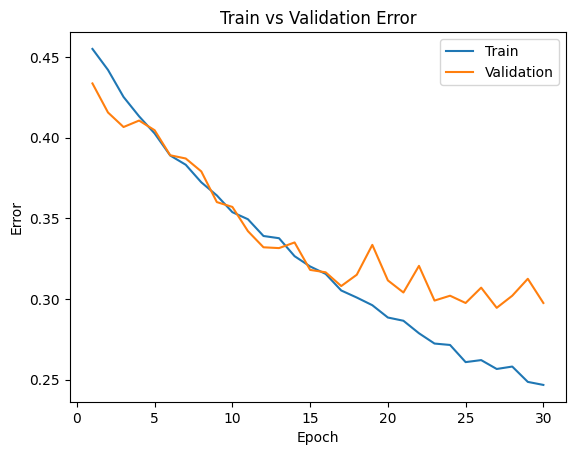

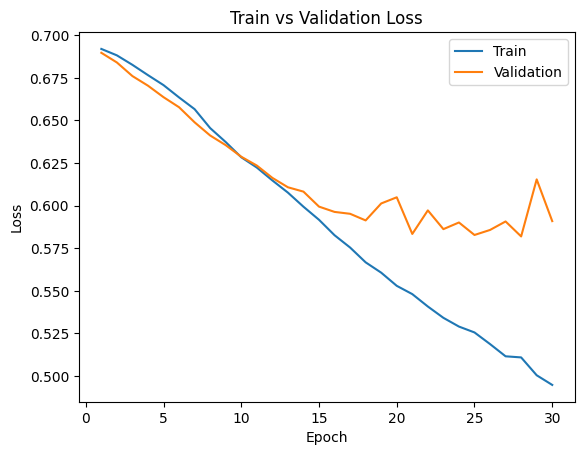

In [70]:
large_net = LargeNet()
train_net(large_net,learning_rate=0.001,batch_size=16)
model_path = get_model_name("large", batch_size=16, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

### Part B.4.c - [1pt]

Based on your result from Part(a), suggest another set of hyperparameter values to try. 
Justify your choice.

In [ ]:
#We still see a little bit of overfit in the above plots, as the validation loss doesn't decrease with 
#the training loss. To fix this let's try to induce some underfit. To do this, let's try to increase the 
#batch size slightly (from 16 to 32), as we saw above that increasing batch size resulted in an underfit model. 

### Part B.4.d - [1pt]

Train the model with the hyperparameters you chose in part(c), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.50225, Train loss: 0.695175797700882 |Validation err: 0.491, Validation loss: 0.6925575714262705
Epoch 2: Train err: 0.502125, Train loss: 0.6925872330665588 |Validation err: 0.483, Validation loss: 0.6913267572720846
Epoch 3: Train err: 0.45525, Train loss: 0.6910795817375183 |Validation err: 0.438, Validation loss: 0.6896116383492
Epoch 4: Train err: 0.439875, Train loss: 0.6892140369415283 |Validation err: 0.424, Validation loss: 0.6865251215677413
Epoch 5: Train err: 0.438625, Train loss: 0.6865296769142151 |Validation err: 0.4175, Validation loss: 0.6830794858554053
Epoch 6: Train err: 0.4335, Train loss: 0.6829587302207947 |Validation err: 0.4125, Validation loss: 0.6786034220740909
Epoch 7: Train err: 0.4285, Train loss: 0.6793528752326965 |Validation err: 0.4145, Validation loss: 0.6756040170079186
Epoch 8: Train err: 0.419875, Train loss: 0.6753992033004761 |Validation err: 0.415,

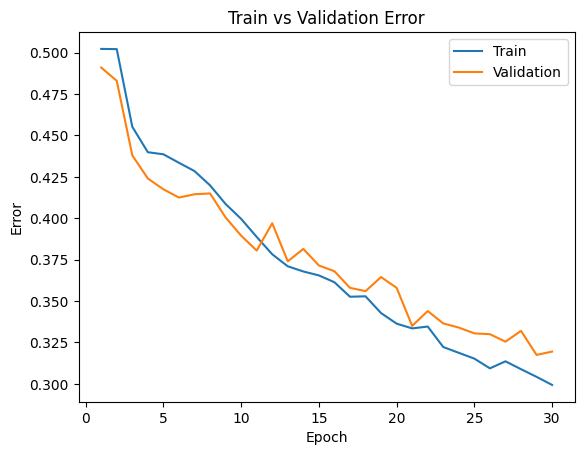

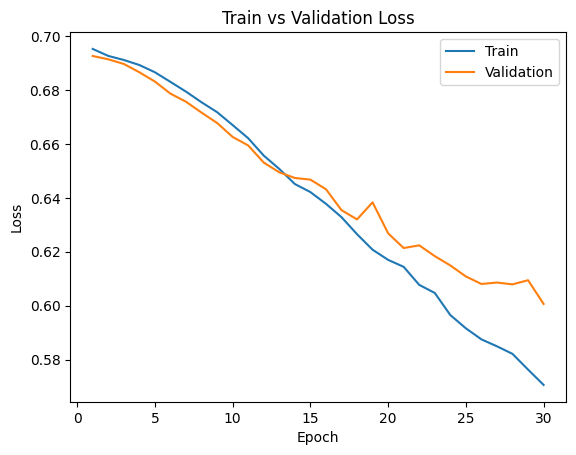

In [119]:
#increasing batch size from 16 to 32
large_net = LargeNet()
train_net(large_net,learning_rate=0.001,batch_size=32)
model_path = get_model_name("large", batch_size=32, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

In [ ]:
#From the plots we can see that we definitely succeeded in reducing some of our overfit, and the validation loss now better tracks the training loss, 
#however, our final validation error is still slightly increased. Perhaps more epochs would be required with this configuration to converge to the 
#optimal solution with a lower validation error. 

## Part B.5 Evaluating the Best Model [9 pt]


### Part B.5.a - [1pt]

Choose the **best** model that you have so far. This means choosing the best model checkpoint,
including the choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`, 
**and the epoch number**.

Modify the code below to load your chosen set of weights to the model object `net`.

In [150]:
net = LargeNet()
# Best Result: train_net(large_net,learning_rate=0.01,batch_size=16) #epoch 10 had a val err of 0.295
model_path = get_model_name(net.name, batch_size=16, learning_rate=0.01, epoch=10)
state = torch.load(model_path)
net.load_state_dict(state)

<All keys matched successfully>

### Part B.5.b - [2pt]

Justify your choice of model from part (a).

In [ ]:
# Best Result was (large_net,learning_rate=0.01,batch_size=16) on epoch 10 which had a val err of 0.295. We use validation error to evaluate our 
# model as it is the best measure of how our model will generalize to new data. Selecting a model based on validation error is a common practice 
# and is a measure  of the difference between the model's predictions and the actual outcomes in the validation set. By choosing a model with the 
# lowest validation error, we ensure that our selection is generalizing as well as possible to unseen data and not just memorizing the training 
# data (if we had used training error to select).

### Part B.5.c - [2pt]

Using the code in Part 0, any code from lecture notes, or any code that you write,
compute and report the **test classification error** for your chosen model.

In [161]:
#Function to return the test classification error
def evaluate2(net, loader):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    net.eval()
 
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
      
        total_epoch += len(labels)
    test_err = 100* float(total_err) / total_epoch

    print("Test error for network '{}' : {:.2f}%".format(net.name,test_err))
    
    return test_err/100

In [162]:
evaluate2(net,test_loader)

Test error for network 'large' : 29.20%


0.292

In [ ]:
#We can see that the test error at 0.292 is very close to our validation error of 0.295, meaning that the model generalized about as 
#well as we expected it from the validation set. This result is consistent and validates our selection of this model checkpoint as 
#it was indeed generalizable to the new data in the test set. 

### Part B.5.d - [2pt]

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

In [ ]:
#Interestingly enough, we find that our test classification error is nearly the same as our validation error, but slightly lower 
#(0.292 vs 0.295), meaning that our model actually performed better on the test set.

#We generally expect the test error to be higher than the validation error because the model has not seen the test data during the 
#training process, so it should struggle more with making predictions on it. The model has been trained on the training data and 
#validated on the validation data, so it is expected to perform better on the validation data compared to the test data. The test 
#data serves as a totally independent evaluation of the model's generalization performance, and so generally the test error is higher 
#than the validation error, as the network gets some exposure to the validation set during model selection. This difference in performance 
#between validation and test data provides a measure of the model's ability to generalize to unseen data. Since we perform well on the test
#set, we can assume that our model has good ability to generalize to new data. 





### Part B.5.e - [2pt]

Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

In [ ]:
#It's important to only use the test data set at the very end because it provides a final/independent evaluation of the model's performance. 
#We use the test set as sparingly as possible as we want to save that for evaluating the generalizability of our model.Using the test data 
#during the model development process runs the risk of overfitting the model to the test data, reducing its ability to generalize to new, 
#unseen data. To prevent this (overfitting), we split into three sets: training, validation, and test. The models are 
#trained on the training data and assessed on the validation data. This helps us pick a model and provides a good estimate of how well the 
#model will generalize to new, unseen data without compromising the independence of the test data. Only once the model has been fully developed 
#and all hyperparameters are selected, do we finally evaluated on the test data to obtain a final estimate of its performance that we can report.

## Part B.6 Fully-Connected Linear ANN vs CNN [9 pt]

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.


### Part B.6.a - [3 pt]

How does the your best CNN model compare with an 2-layer linear ANN model (no convolutional layers) on classifying cat and dog images?

In [164]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(32*32*3, 100)
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.418625, Train loss: 0.6723133516311646 |Validation err: 0.407, Validation loss: 0.658509636297822
Epoch 2: Train err: 0.384625, Train loss: 0.648327088356018 |Validation err: 0.4, Validation loss: 0.6550557408481836
Epoch 3: Train err: 0.36225, Train loss: 0.6335180311203003 |Validation err: 0.3805, Validation loss: 0.6426991801708937
Epoch 4: Train err: 0.344875, Train loss: 0.6181723747253418 |Validation err: 0.4065, Validation loss: 0.6740010865032673
Epoch 5: Train err: 0.32675, Train loss: 0.6022828674316406 |Validation err: 0.3755, Validation loss: 0.6450205557048321
Epoch 6: Train err: 0.3055, Train loss: 0.583338745355606 |Validation err: 0.372, Validation loss: 0.6437205281108618
Epoch 7: Train err: 0.301375, Train loss: 0.5682248003482818 |Validation err: 0.3665, Validation loss: 0.6421936601400375
Epoch 8: Train err: 0.271125, Train loss: 0.5427550208568573 |Validation err: 0.36

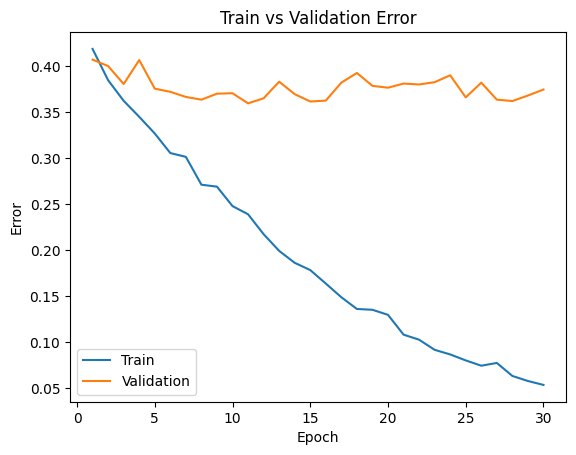

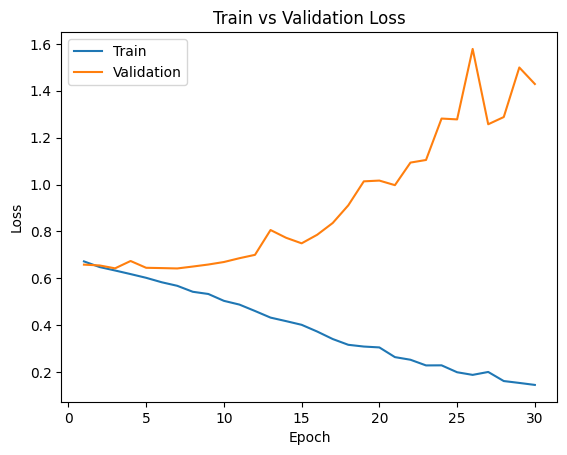

In [169]:
#Train with Default Params

nnet = simpleANN()
train_net(nnet,learning_rate=0.01,batch_size=64)
model_path = get_model_name(nnet.name, batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.50225, Train loss: 0.6978855058550835 |Validation err: 0.491, Validation loss: 0.694826140999794
Epoch 2: Train err: 0.50225, Train loss: 0.6963707953691483 |Validation err: 0.491, Validation loss: 0.6932659894227982
Epoch 3: Train err: 0.50225, Train loss: 0.6945833973586559 |Validation err: 0.491, Validation loss: 0.6919440776109695
Epoch 4: Train err: 0.50225, Train loss: 0.6931623443961143 |Validation err: 0.491, Validation loss: 0.6906936317682266
Epoch 5: Train err: 0.50225, Train loss: 0.6920733414590359 |Validation err: 0.491, Validation loss: 0.6898404061794281
Epoch 6: Train err: 0.50225, Train loss: 0.6909613087773323 |Validation err: 0.491, Validation loss: 0.6888675838708878
Epoch 7: Train err: 0.50225, Train loss: 0.6899741925299168 |Validation err: 0.491, Validation loss: 0.6880487203598022
Epoch 8: Train err: 0.500375, Train loss: 0.6889952681958675 |Validation err: 0.487, 

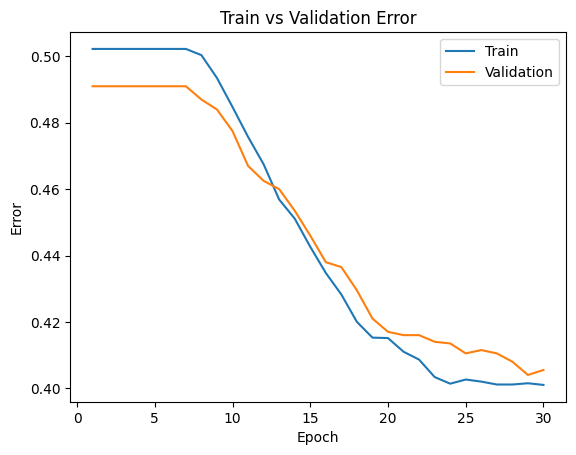

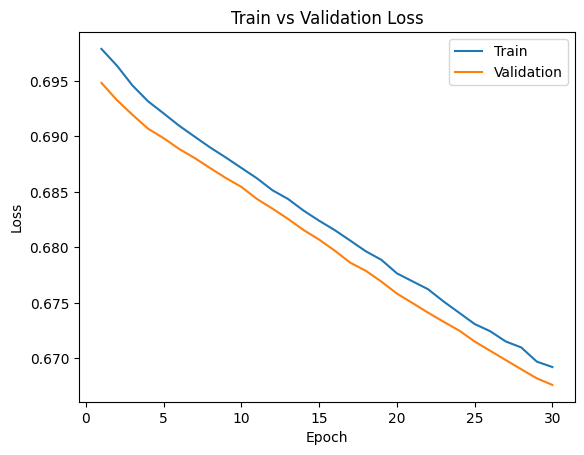

In [174]:
#Reduce the very high overfit, increase batch size and reduce learning rate

nnet = simpleANN()
train_net(nnet,learning_rate=0.001,batch_size=512)
model_path = get_model_name(nnet.name, batch_size=512, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.47925, Train loss: 0.6912242826074362 |Validation err: 0.4235, Validation loss: 0.6826830729842186
Epoch 2: Train err: 0.4065, Train loss: 0.6760966405272484 |Validation err: 0.4075, Validation loss: 0.6694435179233551
Epoch 3: Train err: 0.401125, Train loss: 0.6648612935096025 |Validation err: 0.405, Validation loss: 0.6617859527468681
Epoch 4: Train err: 0.392875, Train loss: 0.6557941623032093 |Validation err: 0.396, Validation loss: 0.6569504961371422
Epoch 5: Train err: 0.38, Train loss: 0.6487792450934649 |Validation err: 0.3965, Validation loss: 0.6537022516131401
Epoch 6: Train err: 0.376, Train loss: 0.6442607641220093 |Validation err: 0.394, Validation loss: 0.6515075713396072
Epoch 7: Train err: 0.368125, Train loss: 0.6375670656561852 |Validation err: 0.3815, Validation loss: 0.6500866711139679
Epoch 8: Train err: 0.356125, Train loss: 0.6314593497663736 |Validation err: 0.392

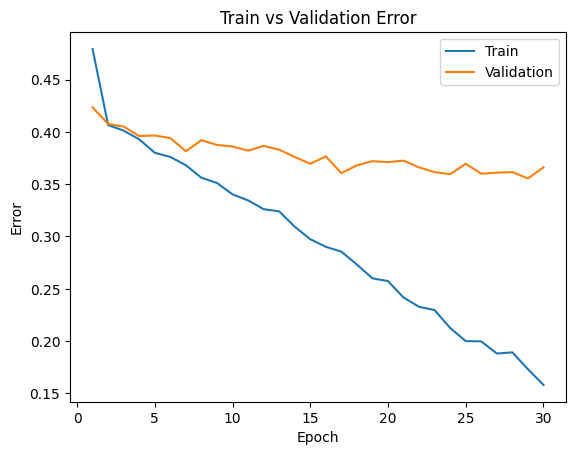

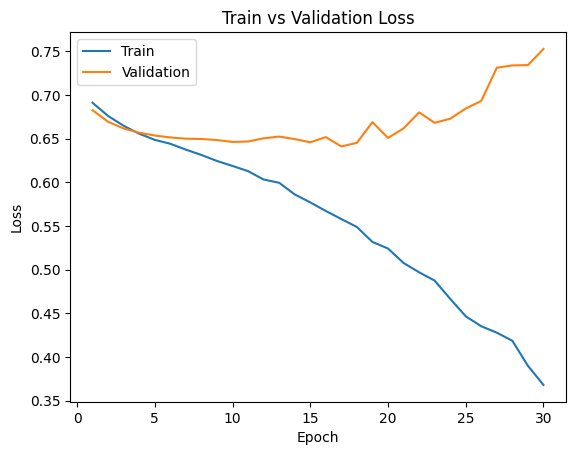

In [172]:
#too much underfit, induce more overfit

nnet = simpleANN()
train_net(nnet,learning_rate=0.008,batch_size=256)
model_path = get_model_name(nnet.name, batch_size=256, learning_rate=0.008, epoch=29)
plot_training_curve(model_path)

In [173]:
#still some overfit, but the validation error has improved so we will proceed with this as our best model setup

net = simpleANN()

model_path = get_model_name(net.name, batch_size=256, learning_rate=0.008, epoch=29)
state = torch.load(model_path)
net.load_state_dict(state)

evaluate2(net,test_loader)

Test error for network 'simple' : 36.25%


0.3625

In [ ]:
#The test error for the SimpleANN is worse than our best CNN, so the CNN was better at classifying the images.

### Part B.6.b - [6 pt]

Implement a 3-layer ANN architecture with dropout and batch normalization (separately). Compare the performance of this model with the simpleANN model provided above.

In [176]:
# define model here

import torch.nn as nn

class ANNWithDropout(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(ANNWithDropout, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(32*32*3, 100)
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 1)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x


class ANNWithBatchNorm(nn.Module):
    def __init__(self):
        super(ANNWithBatchNorm, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(32*32*3, 100)
        self.batchnorm1 = nn.BatchNorm1d(100)
        self.fc2 = nn.Linear(100, 20)
        self.batchnorm2 = nn.BatchNorm1d(20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = self.fc1(x)
        x = self.batchnorm1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = self.batchnorm2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x


Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.4465, Train loss: 0.6814133739471435 |Validation err: 0.4205, Validation loss: 0.6705670915544033
Epoch 2: Train err: 0.414375, Train loss: 0.6681487474441529 |Validation err: 0.419, Validation loss: 0.6705053392797709
Epoch 3: Train err: 0.400375, Train loss: 0.6601205825805664 |Validation err: 0.3865, Validation loss: 0.6671062931418419
Epoch 4: Train err: 0.38575, Train loss: 0.6490610890388488 |Validation err: 0.407, Validation loss: 0.6642611157149076
Epoch 5: Train err: 0.38875, Train loss: 0.6497900905609131 |Validation err: 0.391, Validation loss: 0.663072818890214
Epoch 6: Train err: 0.378375, Train loss: 0.6442734746932983 |Validation err: 0.402, Validation loss: 0.6586196403950453
Epoch 7: Train err: 0.374125, Train loss: 0.6445508227348328 |Validation err: 0.393, Validation loss: 0.6656347196549177
Epoch 8: Train err: 0.367, Train loss: 0.6376771240234375 |Validation err: 0.411

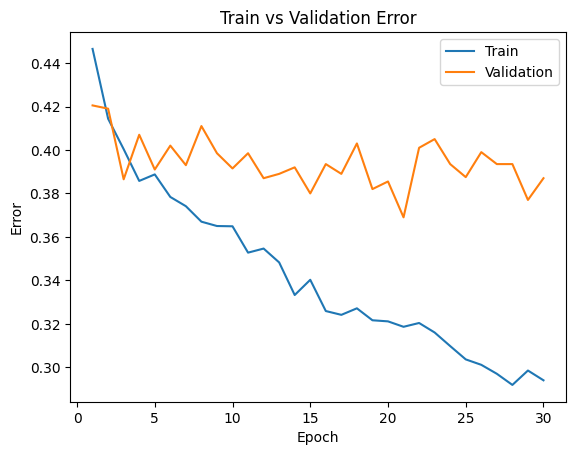

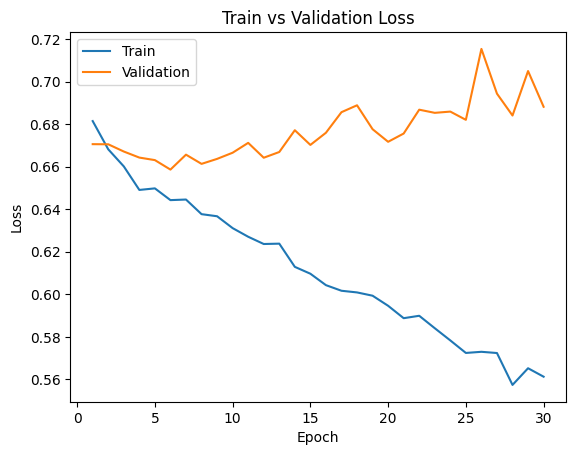

In [178]:
# perform your comparison here

#start with default training parameters

nnet = ANNWithDropout()
train_net(nnet,learning_rate=0.01,batch_size=64)
model_path = get_model_name(nnet.name, batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.494125, Train loss: 0.6946029178798199 |Validation err: 0.476, Validation loss: 0.690461054444313
Epoch 2: Train err: 0.464625, Train loss: 0.6888730861246586 |Validation err: 0.43, Validation loss: 0.6844265908002853
Epoch 3: Train err: 0.44175, Train loss: 0.6833464652299881 |Validation err: 0.439, Validation loss: 0.684223860502243
Epoch 4: Train err: 0.428125, Train loss: 0.680328942835331 |Validation err: 0.45, Validation loss: 0.6851460933685303
Epoch 5: Train err: 0.422625, Train loss: 0.6767844073474407 |Validation err: 0.439, Validation loss: 0.6822264343500137
Epoch 6: Train err: 0.418, Train loss: 0.6735860407352448 |Validation err: 0.4035, Validation loss: 0.6750389337539673
Epoch 7: Train err: 0.413625, Train loss: 0.6723667196929455 |Validation err: 0.4125, Validation loss: 0.6752804666757584
Epoch 8: Train err: 0.411375, Train loss: 0.6711411960422993 |Validation err: 0.419,

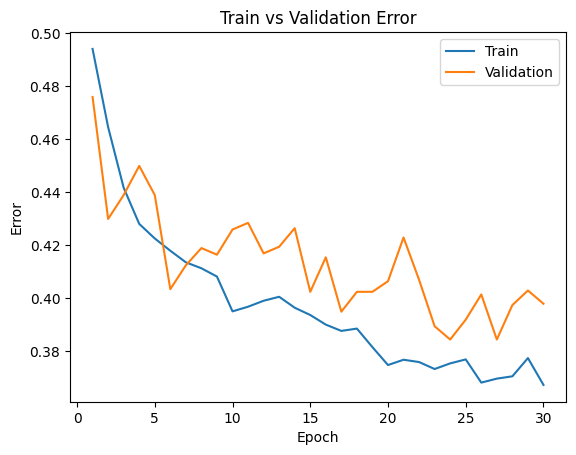

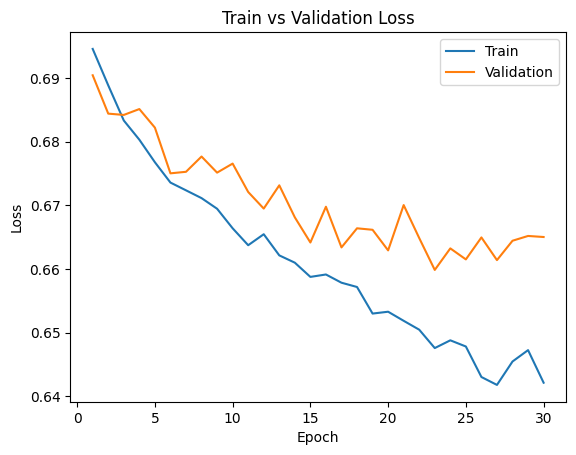

In [182]:
#reduce some overfit

nnet = ANNWithDropout()
train_net(nnet,learning_rate=0.005,batch_size=512)
model_path = get_model_name(nnet.name, batch_size=512, learning_rate=0.005, epoch=29)
plot_training_curve(model_path)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.470875, Train loss: 0.6891380739212036 |Validation err: 0.4375, Validation loss: 0.6827414650765676
Epoch 2: Train err: 0.4235, Train loss: 0.6750205500125885 |Validation err: 0.4175, Validation loss: 0.6717958431395273
Epoch 3: Train err: 0.410625, Train loss: 0.6679476354122161 |Validation err: 0.407, Validation loss: 0.6687109054081024
Epoch 4: Train err: 0.4, Train loss: 0.6621121950149537 |Validation err: 0.4075, Validation loss: 0.6656041145324707
Epoch 5: Train err: 0.39325, Train loss: 0.6588496932983399 |Validation err: 0.4085, Validation loss: 0.6621038790733095
Epoch 6: Train err: 0.392625, Train loss: 0.655918338060379 |Validation err: 0.397, Validation loss: 0.6658563765268477
Epoch 7: Train err: 0.381625, Train loss: 0.6497947759628296 |Validation err: 0.399, Validation loss: 0.6639178272277589
Epoch 8: Train err: 0.385125, Train loss: 0.6524160807132721 |Validation err: 0.40

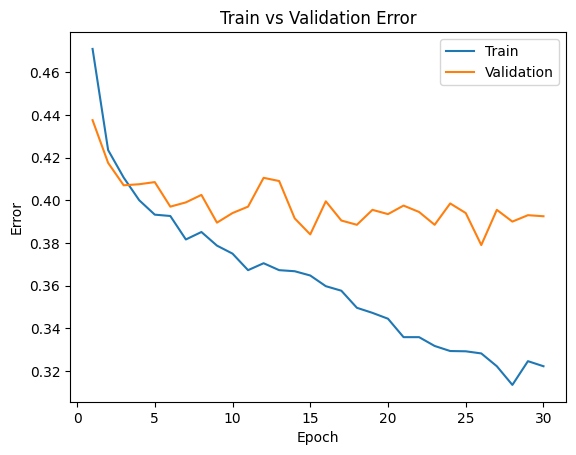

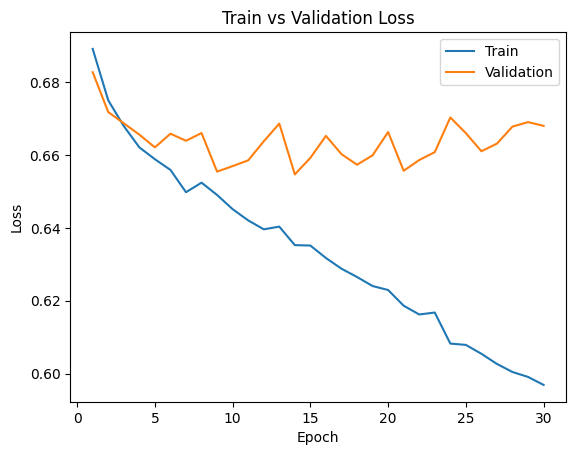

In [183]:
#improved on val error slightly, but now there is too much underfit, reduce batch size and adjust learning rate slightly

nnet = ANNWithDropout()
train_net(nnet,learning_rate=0.001,batch_size=32)
model_path = get_model_name(nnet.name, batch_size=32, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

In [184]:
#slight improvement but we are having a difficult time getting the val error much below 0.4, we will stick with our best model checkpoint so far

#still some overfit, but the validation error has improved so we will proceed with this as our best model setup (val error 0.3885)

net = ANNWithDropout()

model_path = get_model_name(net.name, batch_size=32, learning_rate=0.001, epoch=18)
state = torch.load(model_path)
net.load_state_dict(state)

evaluate2(net,test_loader)

Test error for network 'simple' : 35.85%


0.35850000000000004

In [ ]:
#Classification test error of 35.85% is still higher than our best CNN

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.40925, Train loss: 0.6650221652984619 |Validation err: 0.3975, Validation loss: 0.6527148690074682
Epoch 2: Train err: 0.358625, Train loss: 0.6329428162574768 |Validation err: 0.396, Validation loss: 0.6546328850090504
Epoch 3: Train err: 0.345, Train loss: 0.6137401852607727 |Validation err: 0.3855, Validation loss: 0.6427954267710447
Epoch 4: Train err: 0.31175, Train loss: 0.5920014114379882 |Validation err: 0.406, Validation loss: 0.6809435524046421
Epoch 5: Train err: 0.300375, Train loss: 0.5743304870128632 |Validation err: 0.3695, Validation loss: 0.6498559191823006
Epoch 6: Train err: 0.2785, Train loss: 0.5486719143390656 |Validation err: 0.376, Validation loss: 0.6700684111565351
Epoch 7: Train err: 0.256, Train loss: 0.5235336563587188 |Validation err: 0.3685, Validation loss: 0.670923731289804
Epoch 8: Train err: 0.24825, Train loss: 0.5039977810382843 |Validation err: 0.35, V

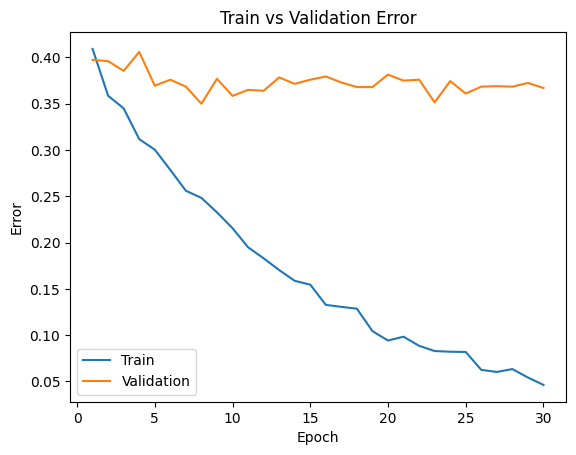

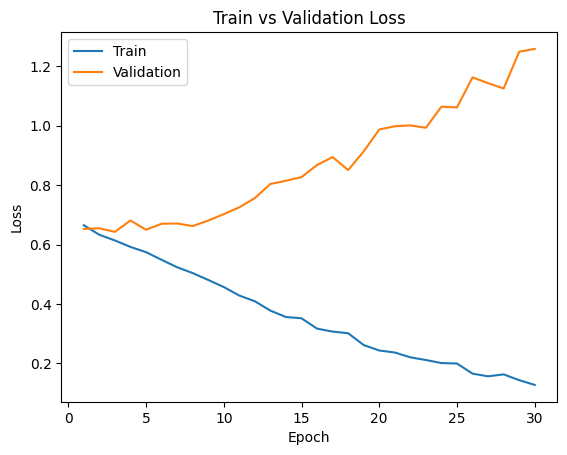

In [179]:
#Now Lets look at ANN with Batch Norm, start with default parameters

nnet = ANNWithBatchNorm()
train_net(nnet,learning_rate=0.01,batch_size=64)
model_path = get_model_name(nnet.name, batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.43125, Train loss: 0.6800363130039639 |Validation err: 0.392, Validation loss: 0.6608756929636002
Epoch 2: Train err: 0.378125, Train loss: 0.643729775670975 |Validation err: 0.386, Validation loss: 0.6495279632508755
Epoch 3: Train err: 0.354375, Train loss: 0.6270842202126033 |Validation err: 0.385, Validation loss: 0.6443486921489239
Epoch 4: Train err: 0.337, Train loss: 0.6123384114295717 |Validation err: 0.3835, Validation loss: 0.6432307064533234
Epoch 5: Train err: 0.31975, Train loss: 0.5981586783651321 |Validation err: 0.378, Validation loss: 0.6399197019636631
Epoch 6: Train err: 0.29475, Train loss: 0.5812744044122242 |Validation err: 0.3825, Validation loss: 0.6456650793552399
Epoch 7: Train err: 0.27675, Train loss: 0.5652701343808856 |Validation err: 0.365, Validation loss: 0.6383219510316849
Epoch 8: Train err: 0.265875, Train loss: 0.5504447694808717 |Validation err: 0.372

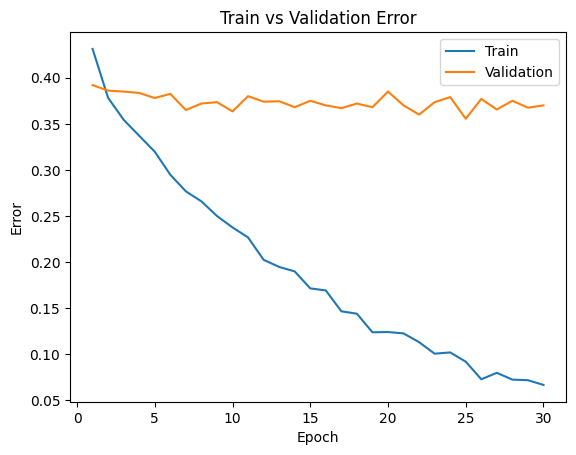

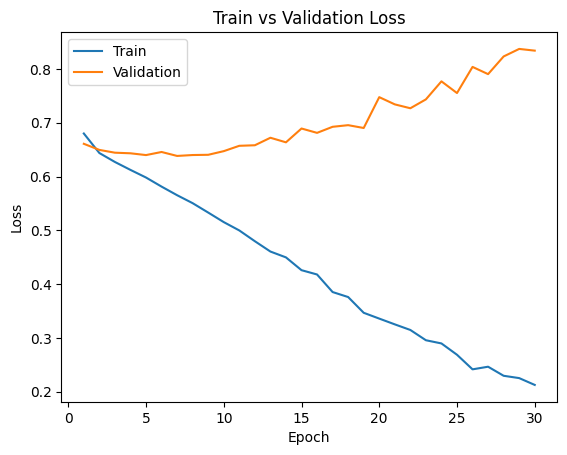

In [185]:
#there is overfit in the above plots, reduce learning rate and increase batch size

nnet = ANNWithBatchNorm()
train_net(nnet,learning_rate=0.001,batch_size=128)
model_path = get_model_name(nnet.name, batch_size=128, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.46275, Train loss: 0.6934899967163801 |Validation err: 0.414, Validation loss: 0.6632956191897392
Epoch 2: Train err: 0.390375, Train loss: 0.6520498618483543 |Validation err: 0.3935, Validation loss: 0.6521293222904205
Epoch 3: Train err: 0.36, Train loss: 0.6330216564238071 |Validation err: 0.378, Validation loss: 0.6467647477984428
Epoch 4: Train err: 0.337375, Train loss: 0.6201859842985868 |Validation err: 0.38, Validation loss: 0.6425980627536774
Epoch 5: Train err: 0.32825, Train loss: 0.6094541028141975 |Validation err: 0.3725, Validation loss: 0.6399000585079193
Epoch 6: Train err: 0.3115, Train loss: 0.5989106558263302 |Validation err: 0.3695, Validation loss: 0.6405619531869888
Epoch 7: Train err: 0.303875, Train loss: 0.5895369034260511 |Validation err: 0.368, Validation loss: 0.638116754591465
Epoch 8: Train err: 0.286125, Train loss: 0.5796492081135511 |Validation err: 0.3655

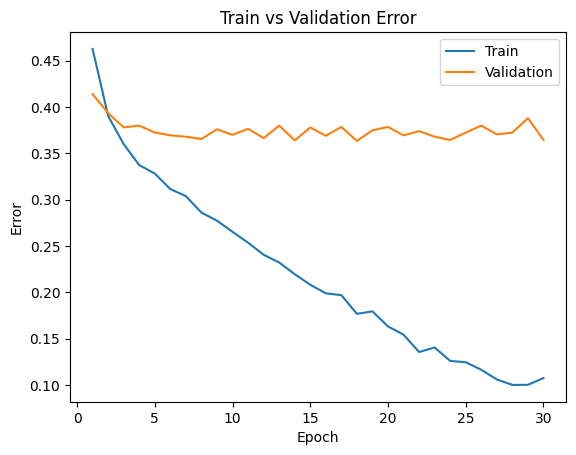

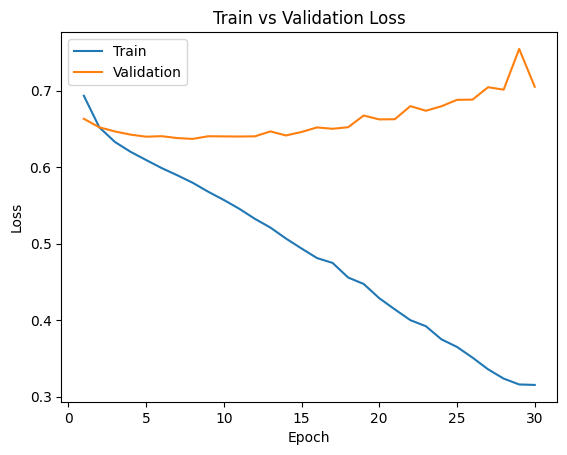

In [186]:
#there is still lots of overfit in the above plots, increase batch size further

nnet = ANNWithBatchNorm()
train_net(nnet,learning_rate=0.001,batch_size=256)
model_path = get_model_name(nnet.name, batch_size=256, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.468625, Train loss: 0.6959498859941959 |Validation err: 0.4415, Validation loss: 0.6822229623794556
Epoch 2: Train err: 0.429125, Train loss: 0.6746491231024265 |Validation err: 0.4225, Validation loss: 0.6692409515380859
Epoch 3: Train err: 0.4065, Train loss: 0.6637581959366798 |Validation err: 0.4125, Validation loss: 0.6654350012540817
Epoch 4: Train err: 0.39475, Train loss: 0.6568332500755787 |Validation err: 0.4115, Validation loss: 0.661703035235405
Epoch 5: Train err: 0.382875, Train loss: 0.6508496068418026 |Validation err: 0.4105, Validation loss: 0.6604294776916504
Epoch 6: Train err: 0.375125, Train loss: 0.6467593908309937 |Validation err: 0.404, Validation loss: 0.657739520072937
Epoch 7: Train err: 0.37, Train loss: 0.6429687142372131 |Validation err: 0.407, Validation loss: 0.6571404039859772
Epoch 8: Train err: 0.365, Train loss: 0.6391069777309895 |Validation err: 0.4035

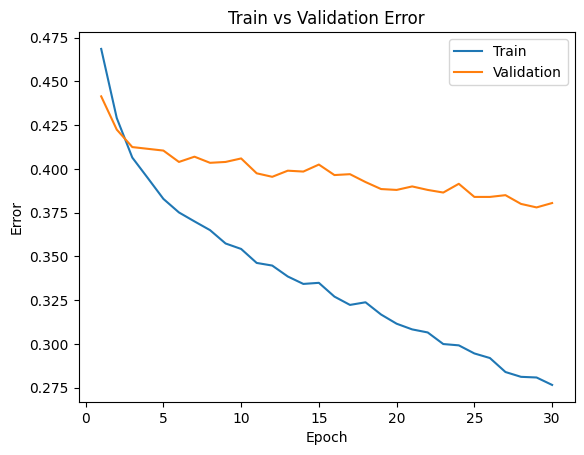

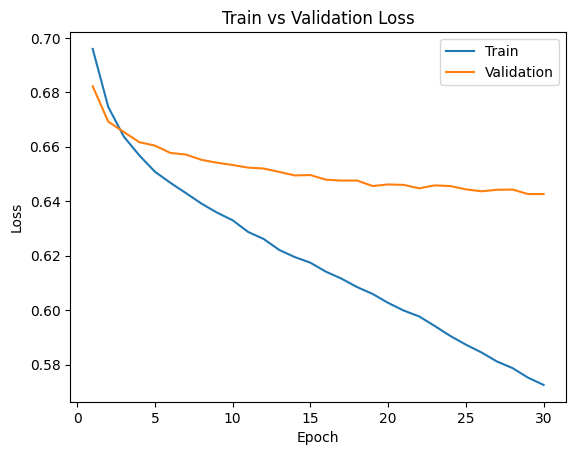

In [188]:
#there is still lots of overfit in the above plots, increase batch size further

nnet = ANNWithBatchNorm()
train_net(nnet,learning_rate=0.0005,batch_size=512)
model_path = get_model_name(nnet.name, batch_size=512, learning_rate=0.0005, epoch=29)
plot_training_curve(model_path)

In [ ]:
#most of the overfit has been reduced, but we haven't been able to improve val error any further, so we'll stick with our best checkpoint thus 
#far

In [189]:
net = ANNWithBatchNorm()

model_path = get_model_name(net.name, batch_size=64, learning_rate=0.01, epoch=8) #val error 0.35
state = torch.load(model_path)
net.load_state_dict(state)

evaluate2(net,test_loader)

Test error for network 'simple' : 37.45%


0.37450000000000006

In [ ]:
#the test error of 0.3745 is worse than the best CNN model which had a test error of 0.292

#It is interesting to note that all the ANNs where worse than our best CNN. We should note that tuning may play a significant factor in these 
#results. The CNN was more meticulously tuned and it may have resulted in a more optimal set of hyperparameters for it. 

## Part B.7-Conceptual Questions [6 pt]

### Part B.7.a - [3 pt]

Explain the difference between L1 and L2 regularization and when it is appropriate to use one over the other. How would you implement L1 regularization in simpleANN?

Answer:

Both L1 and L2 regularization are techniques used to prevent overfitting by adding a penalty to the cost function. The L1 penalty is proportional to the absolute value of the weights, while the L2 penalty is proportional to the square of the weights. L1 regularization is useful when we have a large number of features and we want to select a subset of them, whereas L2 regularization is useful when the goal is to prevent overfitting. It is important to note that the absolute value function contains points where it is non-differentiable and so it may not be advisable to use L1 regularization for weight decay, whereas L2 is well-suited to this task. 

To implement L1 regularization in simpleANN, we could add the L1 penalty term to the cost function by multiplying the absolute values of the weights (using torch.norm(all linear parameters, 1)) by a hyperparameter lambda and adding it to the cross entropy loss:

loss = cross_entropy_loss + l1_regularization 

loss.backward()

optimizer.step()

We then apply the backwards step using this loss function to update the weights.

### Part B.7.b - [3 pt]

Describe the impact of different activation functions (e.g. ReLU, Sigmoid, Tanh) on the performance of the model. How would you go about choosing the appropriate activation function for simpleANN?

Answer:

Activation functions are used to introduce non-linearity into the neural network. Different activation functions can have a significant impact on the performance of the model, depending on the specific task and the structure of the data. For example:

Sigmoid: Often used for binary classification. The output of the sigmoid function is between 0 and 1, which is the probability of the input belonging to a particular class. This function can produce slow convergence and vanishing gradient problems in deep networks.

Tanh: The tanh activation function is similar to the sigmoid function, but with outputs between -1 and 1. It is often used in multi-class classification problems and can improve the convergence of the network.

ReLU: This is one of the most widely used activation functions in deep learning. ReLU provides a simple non-linear transformation that speeds up the convergence of the network.

When choosing an activation function, it is important to consider the specific task and the structure of the data. For example, if you are working on a binary classification problem, you may consider using sigmoid or softmax activation function in the output layer. If you are working on a regression problem, you might use a linear activation function. If you are working on a deep learning problem, you might use ReLU or Leaky ReLU activation function.
In case of simpleANN, the best way to select the activation function is by experimenting with different options and selecting the one that performs best on the task at hand. This can be done by training the model with different activation functions and comparing their performance using metrics such as test accuracy, precision, recall, F1-score, etc.


### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [190]:
%%shell
jupyter nbconvert --to html LAB_1_ANN_and_PyTorch.ipynb

UsageError: Cell magic `%%shell` not found.


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus